<a href="https://colab.research.google.com/github/feltri08/Proyecto_IA/blob/main/Proyecto_Alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASIFICACION DE IMAGENES DE ALZHEIMER

**Presentado por:**

Sergio Andrés Carrillo Muñoz 

Juan Felipe Ortiz Trilloz



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Librerias 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os

 **CLASES DEL DATASET**

Las clases del dataset se definen de la siguiente forma:


1.  NonDemented
2.  ModerateDemented
3.  MildDemented
4.  VeryMildDemented

El dataset a trabajar ya tiene las particiones de Train y Test.

Acontinuacion cargaremos los datos de Train y test para cada una de las clases: 

   

In [ ]:
#especifica la ruta y lee el nombre de los documentos dentro de dicha carpeta para la primera clase
path_classes = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/train/NonDemented'
classes_names = os.listdir(path_classes)

#creamos dos listas para empezar a guardar las imagenes 
X_train=[] #lista con caracteristicas (imagenes)
X_test = [] #lista con imágenes de test
y_train=[] #lista con etiquetas
y_test = []
dim = (150,150)  #Dimensiones para las imagenes que trabajaremos

#carga la imagenes
for i in classes_names:
  img = cv2.imread(path_classes+'/'+i)
  img = cv2.resize(img, dim)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  X_train.append(gray.flatten()) #guarda la imagen en la lista 
  y_train.append(0)  #0 NonDemented


In [ ]:
#especifica la ruta y lee el nombre de los documentos dentro de dicha carpeta para la segunda clase
path_classes = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/train/ModerateDemented'
loadtest = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/test/ModerateDemented'
classes_names = os.listdir(path_classes)
test = os.listdir(loadtest)

#carga la imagenes
for i in classes_names:
  img = cv2.imread(path_classes+'/'+i)
  img = cv2.resize(img, dim)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  X_train.append(gray.flatten()) #guarda la imagen en la lista 
  y_train.append(1)  #1 ModerateDemented

for j in test:
  img_t = cv2.imread(loadtest +'/'+j)
  img_t = cv2.resize(img_t, dim)
  gray_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2GRAY)  
  X_test.append(gray_t.flatten()) 
  y_test.append(0)  #0 NonDemented

In [ ]:
#especifica la ruta y lee el nombre de los documentos dentro de dicha carpeta para la tercera clase
path_classes = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/train/MildDemented'
classes_names = os.listdir(path_classes)

#carga la imagenes
for i in classes_names:
  img = cv2.imread(path_classes+'/'+i)
  img = cv2.resize(img, dim)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  X_train.append(gray.flatten()) #guarda la imagen en la lista 
  y_train.append(2)  #2 MildDemented

In [ ]:
#especifica la ruta y lee el nombre de los documentos dentro de dicha carpeta para la cuarta clase
path_classes = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/train/VeryMildDemented'
classes_names = os.listdir(path_classes)

#carga la imagenes
for i in classes_names:
  img = cv2.imread(path_classes+'/'+i)
  img = cv2.resize(img, dim)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  X_train.append(gray.flatten()) #guarda la imagen en la lista 
  y_train.append(3)  #3 VeryMildDemented

In [ ]:
perm = np.random.permutation(range(len(X_train)))
X_train = np.r_[X_train]
y_train=np.r_[y_train]
X_train=X_train[perm]
y_train=y_train[perm]
print(X_train.shape)

(5121, 22500)


Visualizamos algunas de nuestras imágenes del dataset:

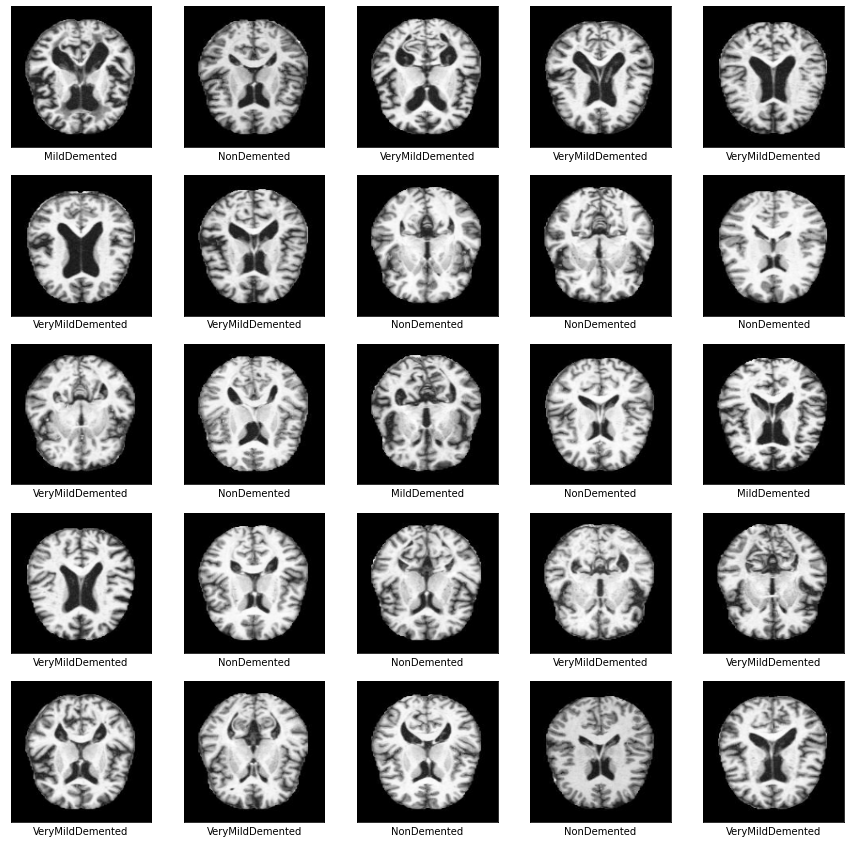

In [ ]:
class_names = ['NonDemented','ModerateDemented','MildDemented','VeryMildDemented']
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i].reshape(150,150), cmap = plt.cm.Greys_r)
    plt.xlabel(class_names[y_train[i]])
  

A continuación se visualizara el numero de imágenes por cada clase. 

In [ ]:
print( "  clase   # de imágenes")
for i in np.unique(y_train):
    print( "   ",int(i), "       ", np.sum(y_train==i))

  clase   # de imágenes
    0         2560
    1         52
    2         717
    3         1792


<br><br><br>
<h3> En este momento realizaremos la carga de la parte de testeo del dataset <h3>

In [ ]:
loadtest = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/test/NonDemented'
test = os.listdir(loadtest)

#creamos dos listas para empezar a guardar las imagenes 
X_test = [] #lista con imágenes de test
y_test = []
dim = (150,150)  #Dimensiones para las imagenes que trabajaremos

for j in test:
  img_t = cv2.imread(loadtest +'/'+j)
  img_t = cv2.resize(img_t, dim)
  gray_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2GRAY)  
  X_test.append(gray_t.flatten()) 
  y_test.append(0)  #0 NonDemented

In [ ]:
loadtest = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/test/ModerateDemented'
test = os.listdir(loadtest)
dim = (150,150)  #Dimensiones para las imagenes que trabajaremos

for j in test:
  img_t = cv2.imread(loadtest +'/'+j)
  img_t = cv2.resize(img_t, dim)
  gray_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2GRAY)  
  X_test.append(gray_t.flatten()) 
  y_test.append(0)  #0 NonDemented

In [ ]:
loadtest = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/test/MildDemented'
test = os.listdir(loadtest)
dim = (150,150)  #Dimensiones para las imagenes que trabajaremos

for j in test:
  img_t = cv2.imread(loadtest +'/'+j)
  img_t = cv2.resize(img_t, dim)
  gray_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2GRAY)  
  X_test.append(gray_t.flatten()) 
  y_test.append(0)  #0 NonDemented

In [ ]:
loadtest = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/test/VerymildDemented'
test = os.listdir(loadtest)
dim = (150,150)  #Dimensiones para las imagenes que trabajaremos

for j in test:
  img_t = cv2.imread(loadtest +'/'+j)
  img_t = cv2.resize(img_t, dim)
  gray_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2GRAY)  
  X_test.append(gray_t.flatten()) 
  y_test.append(0)  #0 NonDemented